In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
from neural_network import NeuralNetwork
from noise_utils import salt_pepper_noise, random_noise, gaussian_noise

# Exercise 3

### Question A

In [3]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [4]:
df = pd.DataFrame(np.concatenate((x, y), axis=1), columns=('x1', 'x2', 'y'))
df.style.hide()

x1,x2,y
0,0,0
0,1,1
1,0,1
1,1,0


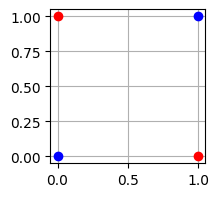

In [5]:
plt.figure(figsize=(2,2))

plt.plot(*x[0], 'o', color='blue')
plt.plot(*x[1], 'o', color='red')
plt.plot(*x[2], 'o', color='red')
plt.plot(*x[3], 'o', color='blue')
plt.grid()

plt.show()

In [6]:
learning_rate = 0.1
epochs = 10000
nn_A = NeuralNetwork([2, 2, 1])
nn_A.train(x, y, learning_rate, epochs)
nn_A.predict(x)

Epoch 0: 0.27201720292556
Epoch 1000: 0.24950853814726087
Epoch 2000: 0.2464213001565453
Epoch 3000: 0.22184426314045583
Epoch 4000: 0.15927430021321978
Epoch 5000: 0.052457324073303765
Epoch 6000: 0.010749519832708746
Epoch 7000: 0.00357410323572594
Epoch 8000: 0.0016543766829931082
Epoch 9000: 0.0009246704094342135


array([[0],
       [1],
       [1],
       [0]])

### Question B

Load raw data

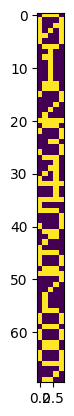

In [7]:
data = np.loadtxt("TP3-ej3-digitos.txt", dtype=np.uint8) 
plt.imshow(data);

Flatten data

In [8]:
data_flattened = data.flatten()
data_flattened = np.reshape(data_flattened, (10, 35))

print(data_flattened.shape)
data_flattened

(10, 35)


array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1

Initialize x input (flattened digit) and y output (result of whether digit is pair)

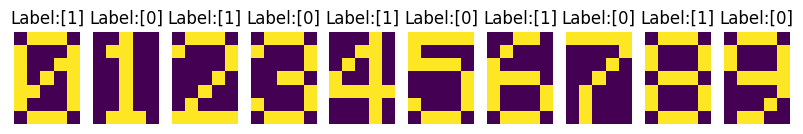

In [9]:
x = data_flattened
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [10]:
learning_rate = 0.1
epochs = 10000

nn_B = NeuralNetwork([35, 10, 1])
nn_B.train(x, y, learning_rate, epochs)
nn_B.predict(x)

Epoch 0: 0.4938367486412491
Epoch 1000: 0.24879703561527053
Epoch 2000: 0.04354085808569064
Epoch 3000: 0.0016499158478601947
Epoch 4000: 0.00044985881363744813
Epoch 5000: 0.00020253710692466845
Epoch 6000: 0.00011404003800369944
Epoch 7000: 7.285855406047621e-05
Epoch 8000: 5.047875289233546e-05
Epoch 9000: 3.7000307166985564e-05


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

digit is even: [[0]]


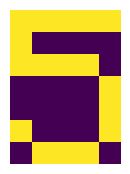

In [11]:
digit = 5

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
plt.axis('off')
res = nn_B.predict(data_flattened[digit])
print('digit is even:', res)

### Exercise C

Initialize data
- x: 10*35 (10 digits * 35 pixels each)
- y: 10*1 (can be classified to 10 possible digits)

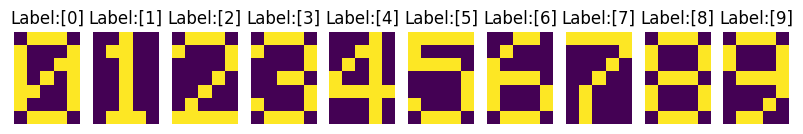

In [12]:
x = data_flattened
y = np.arange(10).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [13]:
input_size = 35
hidden_size = 10
output_size = 10

learning_rate = 0.1
epochs = 100000

nn_C = NeuralNetwork([35, 10, 10], one_hot=True, activation_function='sigmoid')
nn_C.train(x, y, learning_rate, epochs)
nn_C.predict(x)

Epoch 0: 0.876025900210321
Epoch 10000: 0.08998389372210033
Epoch 20000: 0.0889508912124344
Epoch 30000: 0.06628464873165661
Epoch 40000: 0.031559787987361615
Epoch 50000: 0.009460670296212184
Epoch 60000: 0.0027889936204356304
Epoch 70000: 0.0011243066108536576
Epoch 80000: 0.0005827668149971771
Epoch 90000: 0.00035136578968074996


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

digit is: [[7]]


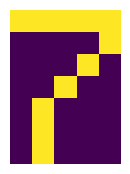

In [14]:
digit = 7

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
res = nn_C.predict(data_flattened[digit])
print('digit is:', res)

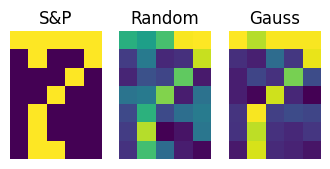

In [15]:
salt_pepper_digit = salt_pepper_noise(data_flattened[digit], 0.05, 0.05)
random_digit = random_noise(data_flattened[digit])
gauss_digit = gaussian_noise(data_flattened[digit], 0.1, 0.1)

noised_data = [salt_pepper_digit, random_digit, gauss_digit]
titles = ['S&P', 'Random', 'Gauss']

plt.figure(figsize=(4,3))
for i, img in enumerate(noised_data):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)));

In [16]:
nn_C.predict(salt_pepper_digit)

array([[7]])

# Analysis / graphs

## 3a

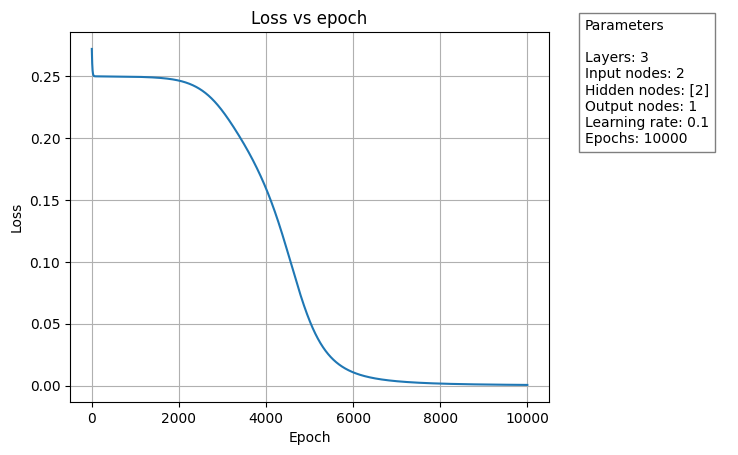

In [17]:
nn_A.graph('loss')

## 3b

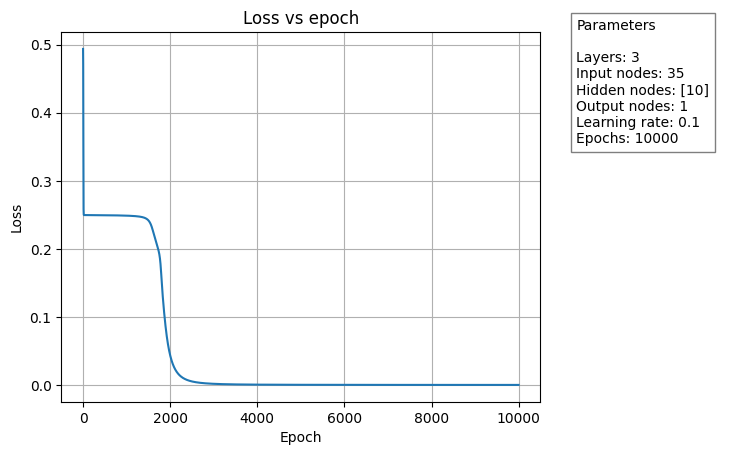

In [18]:
nn_B.graph(graph_type='loss')

## 3c

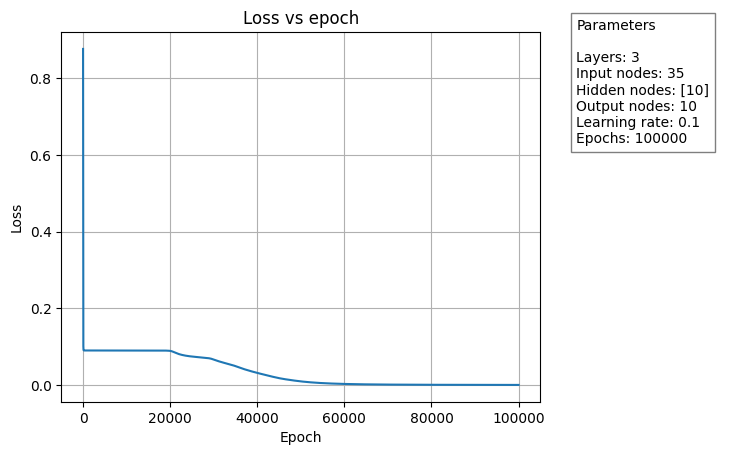

In [19]:
nn_C.graph('loss')

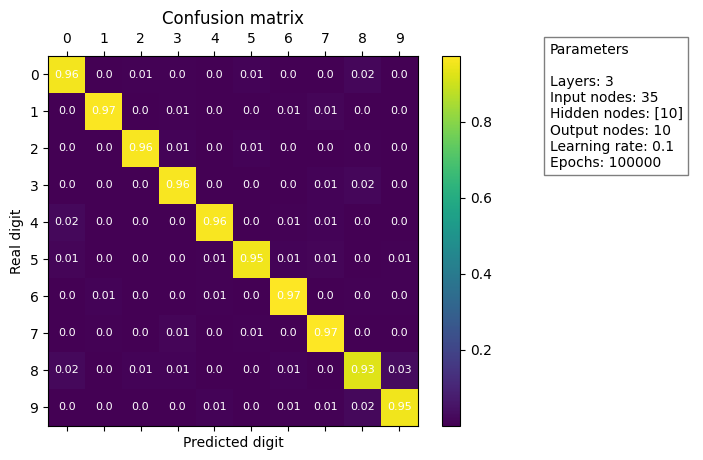

In [20]:
nn_C.graph(graph_type='confusion')